# Домашнее задание № 1 по курсу "Машинное обучение" 

### Выполнила Мирейко Наталья

### Задание 1.

Пусть $f:(0, +\infty)\rightarrow R$ - обратимая функция, а $X$ - случайная величина. 

Нужно доказать, что если $$\forall t>0 \Rightarrow P[X>t]\le f(t) ;(1),$$то $$\forall \delta >0 \Rightarrow P\left[X\le f^{-1}(\delta)\right]\ge 1-\delta ;(2)$$

**Доказательство.** 

Распишем то, что нам нужно доказать, применив формулу вероятности обратного события для последнего преобразования:
$$P\left[X\le f^{-1}(\delta)\right]\ge 1-\delta \Leftrightarrow 1-P\left[X\le f^{-1}(\delta)\right]\le\delta \Leftrightarrow P\left[X>f^{-1}(\delta)\right]\le\delta ;(3)$$Из определения $f:(0, +\infty)\rightarrow R$ следует, что $f^{-1}:R\rightarrow (0, +\infty)$, то есть $f^{-1}(\delta)>0$, а значит, для $f^{-1}(\delta)$ выполняется (1). 
Перепишем (1), полагая $t=f^{-1}(\delta)$ >0 и пользуясь свойством взаимно обратных функций:
$$P\left[X>f^{-1}(\delta)\right]\le f(f^{-1}(\delta))\Leftrightarrow (3),$$ что и требовалось доказать.

### Задание 2.

Пусть $X=R$. 

Нужно доказать, что в классе полиномиальных классификаторов $$h_p(x) = \begin{cases} 1, & \mbox{если } a_0 + a_1 x^1 +...+ a_n x^n\ge 0 \\ 0, & \mbox{иначе} \end{cases}; (1)$$ найдется классификатор, совпадающий с $$h_S(x) = \begin{cases} y_i, & \mbox{если } \exists i \in [m]: x_i=x \\ 0, & \mbox{иначе} \end{cases}; (2)$$

**Доказательство.** 

Положим $\left.S_+\right\vert_x=\{\left.x_i\right\vert\exists i \in [m]: y_i = 1\}$ - множество всех $x$ из выборки $S$, для которых $y = 1$. 
Тогда (2) можем переписать в виде $$h_S(x) = \begin{cases} 1, & \mbox{если } x \in \left.S_+\right\vert_x \\ 0, & \mbox{иначе} \end{cases}; (3).$$
Рассмотрим такой многочлен $p(x)=-\prod\limits_{x_k\in \left.S_+\right\vert_x} (x-x_k)^2$, который при всех $x \in \left.S_+\right\vert_x$ становится равным 0, а для остальных $x \notin \left.S_+\right\vert_x$ принимает значение меньше 0. Этот многочлен порождает гипотезу, которая принадлежит классу пороговых полиномиальных классификаторов и ведет себя абсолютно также, как и $h_S(x)$, что и требовалось доказать.

Гипотеза (2) будет являться одной из ERM-гипотез в классе (1), так как она  принадлежит классу пороговых полиномиальных классификаторов. Однако, для данной гипотезы true risk будет равен 1, то есть применение ERM-парадигмы для класса $h_p(x)$ может приводить к переобучению.

### Задание 3.

Рассмотрим классификатор $$h_{a_1, b_1, a_2, b_2}\left((x_1, x_2)\right) = \begin{cases} 1, & \mbox{если } a_1\le x_1\le b_1 \mbox{и } a_2\le x_2\le b_2 \\ 0, & \mbox{иначе} \end{cases}; (1).$$ Будем считать, что предположение о реализуемости выполнено.


**Задание 3.1.** 

Пусть алгоритм $A$ выбирает наименьший прямоугольник, содержащий все точки положительного класса. Докажем, что $A$ является реализацией ERM-алгоритма.

**Доказательство.** 

Из предположения о реализуемости следует, что существует такой прямоугольник $H^*$, внутри которого находятся все точки положительного класса и нет других точек, причем снаружи него нет точек положительного класса (с точностью до множества меры 0). Таким образом, прямоугольник, полученный алгоритмом $A$, будет лежать внутри $H^*$, т. е. эмпирический риск полученной гипотезы равен 0, что и требовалось доказать.


**Задание 3.2.** 

Пусть $X$ - квадрат с противоположными углами в $(0, 0)$ и $(1, 1)$; $D$ - равномерное распределение над $X$; $f(x)=[(x, y)\in Q]$, где $Q$ - квадрат с противоположными углами в $(0, 0)$ и $\left(\sqrt{1/2}, \sqrt{1/2}\right)$. Реализовать программу, которая принимает число $m$ и генерирует выборку из $m$ точек. Реализовать алгоритм $A$ из задания 3.1 и вычислить true risk полученной гипотезы.

**Решение.** 

Ниже приведена функция task3, которая получает на вход число $m$ и генерирует выборку размера  $m$ (с равномерным распределением), в которой реализован алгоритм $A$ из задания 3.1 и вычисляется true risk по формуле: $\frac{mes(Q-H)}{mes(X)}$, где $H\subseteq Q$ - прямоугольник, полученный алгоритмом A.

In [1]:
from math import sqrt
from scipy.stats import uniform

def calculate_rectangle_area(x_min, x_max, y_min, y_max):
    return (x_max - x_min) * (y_max - y_min) if x_max >= x_min and y_max >= y_min else 0

def task3(m):
    X = (0, 1, 0, 1)
    Q = (0, sqrt(1./2), 0, sqrt(1./2))
    alg_x_min = alg_y_min = 1
    alg_x_max = alg_y_max = 0
    s = []
    
    for i in range(0, m):
      x = uniform.rvs()
      y = uniform.rvs()
    
      if Q[0] <= x <= Q[1] and Q[2] <= y <= Q[3]:
        alg_x_min = min(x, alg_x_min)
        alg_x_max = max(x, alg_x_max)
        alg_y_min = min(y, alg_y_min)
        alg_y_max = max(y, alg_y_max)
        
    areaOfQ = calculate_rectangle_area(Q[0], Q[1], Q[2], Q[3])
    areaOfAlgorithmRectangle = calculate_rectangle_area(alg_x_min, alg_x_max, alg_y_min, alg_y_max)
    areaOfX = calculate_rectangle_area(X[0], X[1], X[2], X[3])
        
    return 1. * ((areaOfQ - areaOfAlgorithmRectangle) / areaOfX)

**Задание 3.3.** 

Построить график true risk в зависимости от $m$.

**Задание 3.4.** 

Запустить программу для всех $m \in [n]$ ($n$ выбрать в зависимости от показателей алгоритма). Для каких $m$ true risk составляет 10%? 1%? 0.1?

**Решение.** 

Ниже приведен график зависимости true risk от $m$, где $m$ изменяется от 1 до 10000, а также его срезы, демонстрирующие значения $m$, для которых true risk становится меньше заданных порогов (10%, 1%, 0.1%) для всех следующих $m$.

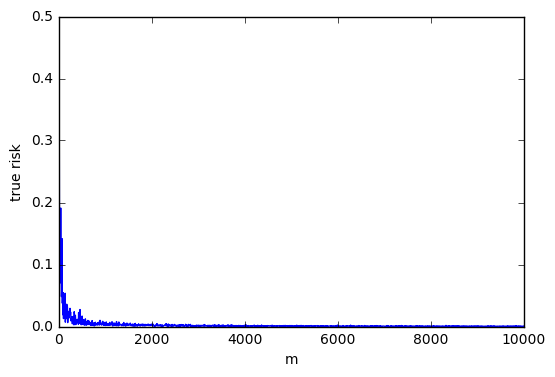

In [105]:
from matplotlib import pyplot

risk_values = []
m_values = []
for m in range(5, 10001, 5):
    risk_values.append(task3(m))
    m_values.append(m)

pyplot.plot(m_values, risk_values)
pyplot.xlabel("m")
pyplot.ylabel("true risk")
pyplot.show()

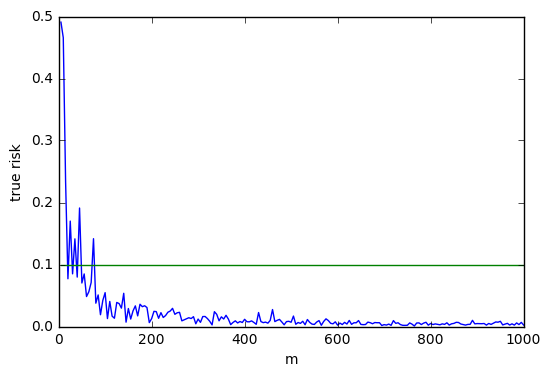

In [109]:
pyplot.plot(m_values[:200], risk_values[:200])
pyplot.plot(m_values[:200], [0.1] * len(m_values[:200]))
pyplot.xlabel("m")
pyplot.ylabel("true risk")
pyplot.show()

Для true risk $< 10\%$ требуется $m\approx 80$

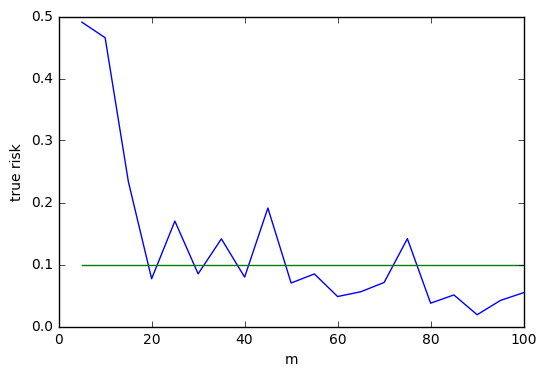

In [108]:
pyplot.plot(m_values[:20], risk_values[:20])
pyplot.plot(m_values[:20], [0.1] * len(m_values[:20]))
pyplot.xlabel("m")
pyplot.ylabel("true risk")
pyplot.show()

Для true risk $< 1\%$ требуется $m\approx 900$

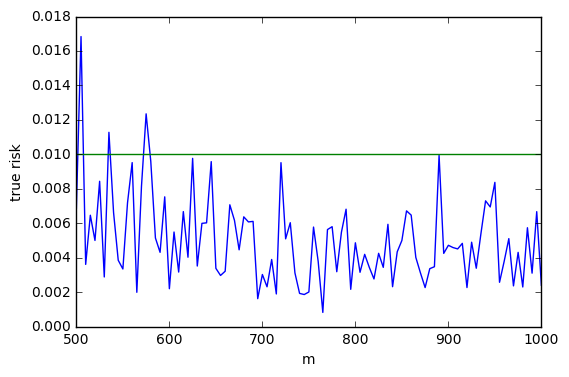

In [110]:
pyplot.plot(m_values[99:200], risk_values[99:200])
pyplot.plot(m_values[99:200], [0.01] * len(m_values[99:200]))
pyplot.xlabel("m")
pyplot.ylabel("true risk")
pyplot.show()

Для true risk $< 0.1\%$ требуется $m\approx 9850$

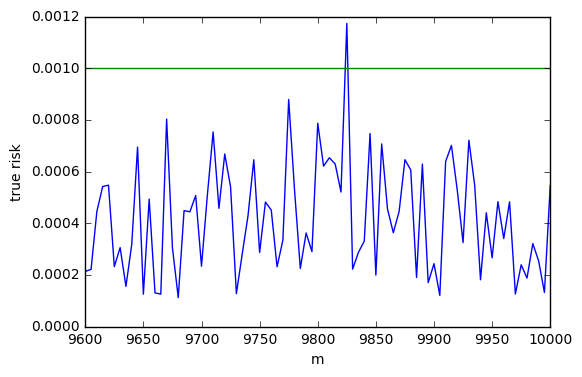

In [113]:
pyplot.plot(m_values[1919:], risk_values[1919:])
pyplot.plot(m_values[1919:], [0.001] * len(m_values[1919:]))
pyplot.xlabel("m")
pyplot.ylabel("true risk")
pyplot.show()

**Задание 3.5.** 

Как ответ на пункт 3.4 зависит от площади $X$ при неизменной площади $Q$? От относительной площади $Q$ и $X$? От размерности пространства $X$? Должен ли зависеть результат от $D$?

**Ответ.**

При неизменной площади $Q$ true risk обратно пропорционален площади $X$ (из формулы вычисления true risk).

Рассмотрим случай неизменной относительной площади $Q$ и $X$. Увеличим площадь и $Q$, и $X$ в $c$ раз и сгенерируем выборку на измененных квадратах. Разделив координаты полученных точек, получим соответствующую выборку и на исходных квадратах. Таким образом, отношение площадей квадратов $H$ для соответствующих гипотез также неизменно и равно $c$, т. е. при неизменном отношении площадей риск не меняется для соответствующих выборок.

Теперь попробуем увеличить размерность множества $X$. Пусть исходная размерность $n-1$. $Q$ и $X$ являются $n-1$-мерными параллелепипедами, формула для вычисления true risk будет выглядеть следующим образом: $$L_D(h, n)=\frac{q^n - h_1*...*h_n}{x^n}.$$ Тогда $$L_D(h, n)-L_D(h, n-1) = \frac{q^n - h_1*...*h_{n-1}*h_n}{x^n} - \frac{q^{n-1} - h_1*...*h_{n-1}}{x^{n-1}} = \left[\frac{q}{x}=\frac{1}{c}, c\ge 1 \right] = \frac{1}{c^{n-1}}\left(\frac{1}{c} - 1\right) + \frac{h_1*...*h_{n-1}}{x^{n-1}}\left(\frac{h_n}{x}-1\right) \le \left[\frac{h_n}{x}\le\frac{q}{x}=\frac{1}{c}\right] \le \left(\frac{1}{c} - 1\right)\left(\frac{1}{c^{n-1}}+\frac{h_1*...*h_{n-1}}{x^{n-1}}\right) \le 0.$$
Таким образом, увеличение размерности влечет к уменьшению риска при неизменных $h_1, ..., h_{n-1}.$

Распределение D влияет на выборку. Вообще говоря, в определении PAC-learnable класса присутствует только гарантированная нижняя оценка для размера выборки, на которой алгоритм вернет хорошую гипотезу. Однако, на практике возможно и такое, что на некоторых распределениях и на меньших размерах выборки можно получить хорошую гипотезу из-за специфики распределения.